# The general idea of proton therapy

Proton therapy delivers a targeted radiation dose on a tumor that will damage the DNA of cells, harm reproduction and eventuall kill the cells. 
In this notebook, we'll look at the physics behind this therapy, just for the fun of it. 

The first difficult word is _dose_. Dose is a quantity which is the measure of the energy deposited in matter by ionizing radiation per unit mass. The location and quantity of the dose depends on the energy of a proton. 

## How much energy does a proton have?

The energy of a moving proton is a combination of its rest mass and kinetic energy. Because the velocity of a proton is close to the speed of light, relativistic effects cannot be ignored. The total mass $E_T$ of a proton is given by the [energy-momentum relation](https://en.wikipedia.org/wiki/Energy%E2%80%93momentum_relation): 

$$
E_T^2 = E_0^2 + E_k^2 
$$

with rest energy $E_0 = m_0c^2$, rest mass $m_0$ is the rest mass, and kinetic energy $E_k=pc$. The typical kinetic energy of protons in radiation therapy is 100 to 250 MeV (Note: _However, a treatment system that can produce 250 MeV protons must provide adequate neutron shielding for neutrons produced by interactions of a beam of this energy in the treatment head and in a patient._, Sengbush et al.). 

The [relativistic expression](https://en.wikipedia.org/wiki/Kinetic_energy#Relativistic_kinetic_energy) for linear momentum $p$ is 

$$
p = m_0\gamma v
$$
with [Lorentz factor](https://en.wikipedia.org/wiki/Lorentz_factor) $\gamma$ defined is
$$
\gamma=\sqrt{1-\beta}^{-1}
$$
where $\beta=v/c$ - the ratio of particle velocity $v$ and the speed of light $c$. Rearranging a bit and substituting the definitions for $E_0 = m_0c^2$ and $E_k=pc$ gives a tidy formulation:
$$
E_k = (\gamma-1)E_0
$$

As function of beta this reads:

$$
\beta = \sqrt{1-\left(\frac{E_k}{E_0} + 1\right)^{-2}}
$$

The velocity is then computed as $v = \beta c$:

In [2]:
# Constants
mp = 1.67262e-27 # rest mass of proton [kg-1]
c = 299792458 # speed of light [ms^-1]

# Rest energy of proton
Joule2MeV = lambda J: J/1.602176634e-13 # conversion from Joule to MeV

E0 = mp*c**2  # in kgms^-2 === Joule

# Convert to MeV
E0 = Joule2MeV(E0)

# Variables
Ek = 250 # MeV

# Functions
beta = lambda Ek:  (1-(Ek/E0 + 1)**-2)**0.5

# given an energy beam of 250 MeV, the total energy is 
Et = (Ek**2 + E0**2)**0.5

# Velocity of a proton
b = beta(Ek)
v = b*c

# Answer
print(f"The velocity of particles in a {Ek} MeV proton beam is {v/1000:.0f} km/s, or {b*100:.5} % the speed of light")



The velocity of particles in a 250 MeV proton beam is 183955 km/s, or 61.361 % the speed of light


## Proton therapy vs the LHC
While the protons in therapy are (initially) going at relativistic speeds, it's nowhere close to the LHC collider. For the fun of it, let's plot how the energy ranges of proton therapy (100-250 MeV) compare to e.g. the LHC collider (1-7 TeV). 

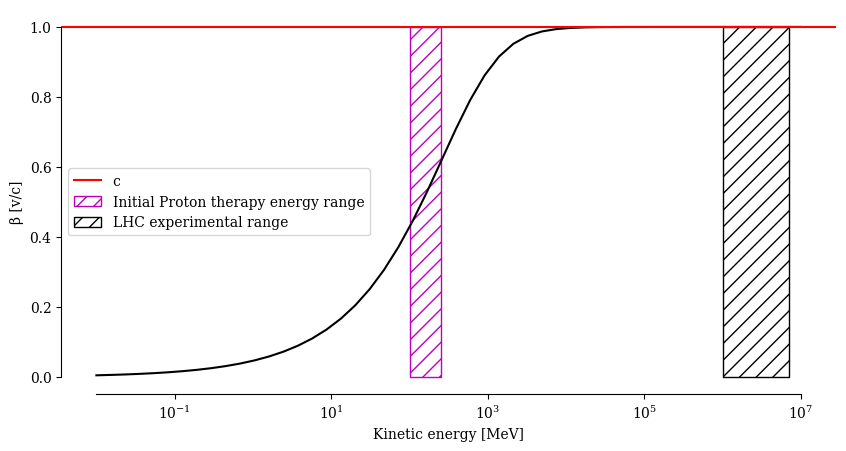

In [3]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np 

plt.rcParams['font.family'] = 'serif'
fig, ax = plt.subplots(1, figsize=(10,5))

e = np.logspace(-2, 7)

ax.plot(e, beta(e), '-k')
ax.axhline(1, color='red', label='c')

ax.fill_betweenx([0, 1], 100, 250, 
                 hatch="//",
                 edgecolor='m', 
                 facecolor="white", 
                 label="Initial Proton therapy energy range")

ax.fill_betweenx([0, 1], 1e6, 7e6, 
                 hatch="//",
                 edgecolor='k', 
                 facecolor="white", 
                 label="LHC experimental range")

ax.set_xscale('log')
ax.set_xlabel('Kinetic energy [MeV]')
ax.set_ylabel('β [v/c]')

x_major = ticker.LogLocator(base = 10) 
x_minor = ticker.LogLocator(base = 10, subs =[1.1, 1.2, 1.3]) 
  
ax.xaxis.set_major_locator(x_major) 
ax.xaxis.set_minor_locator(x_minor)


ax.spines['left'].set_bounds(0, 1)
ax.spines['bottom'].set_bounds(e[0], e[-1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.legend()